## Company Information:
Lending Club is a  peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers. For more basic information about the company please check out the wikipedia article about the company. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>


## Outline: <br>
I. Introduction <br>
a) [General Information](#general_information)<br>
b) [Similar Distributions](#similar_distributions)<br><br>

II. <b>Good Loans vs Bad Loans</b><br>
a) [Types of Loans](#types_of_loans)<br>
b) [Loans issued by Region](#by_region)<br>
c) [A Deeper Look into Bad Loans](#deeper_bad_loans)<br><br>

III. <b>The Business Perspective</b><br>
a) [Understanding the Operative side of Business](#operative_side)<br>
b) [Analysis by Income Category](#income_category) <br><br>

IV. <b>Assesing Risks</b><br>
a) [Understanding the Risky Side of Business](#risky_side)<br>
b) [The importance of Credit Scores](#credit_scores)<br>
c) [What determines a bad loan](#determines_bad_loan)<br>
d) [Defaulted Loans](#defaulted_loans)<br>
e) [Risks by Purposes](#loan_condition)


# Introduction:
## General Information:
<a id="general_information"></a>

In [101]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)


%matplotlib inline

df = pd.read_csv('../lending_club_loan_dataset2/accepted_2007_to_2018Q4.csv', low_memory=False)

#Dropping last 30 row's with no values:
df = df[df['fico_range_high'].notnull()]

# Copy of the dataframe
original_df = df.copy()

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        nan   3600.000     3600.000         3600.000   36 months   
1  68355089        nan  24700.000    24700.000        24700.000   36 months   
2  68341763        nan  20000.000    20000.000        20000.000   60 months   
3  66310712        nan  35000.000    35000.000        35000.000   60 months   
4  68476807        nan  10400.000    10400.000        10400.000   60 months   

   int_rate  installment grade sub_grade                    emp_title  \
0    13.990      123.030     C        C4                      leadman   
1    11.990      820.280     C        C1                     Engineer   
2    10.780      432.660     B        B4                 truck driver   
3    14.850      829.900     C        C5  Information Systems Officer   
4    22.450      289.910     F        F1          Contract Specialist   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years       MORTGAGE   55000.000        Not Verified  Dec-2015   
1  10+ years       MORTGAGE   65000.000        Not Verified  Dec-2015   
2  10+ years       MORTGAGE   63000.000        Not Verified  Dec-2015   
3  10+ years       MORTGAGE  110000.000     Source Verified  Dec-2015   
4    3 years       MORTGAGE  104433.000     Source Verified  Dec-2015   

  loan_status pymnt_plan                                                url  \
0  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
2  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3     Current          n  https://lendingclub.com/browse/loanDetail.acti...   
4  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   

  desc             purpose               title zip_code addr_state    dti  \
0  NaN  debt_consolidation  Debt consolidation    190xx         PA  5.910   
1  NaN      small_business            Business    577xx         SD 16.060   
2  NaN    home_improvement                 NaN    605xx         IL 10.780   
3  NaN  debt_consolidation  Debt consolidation    076xx         NJ 17.060   
4  NaN      major_purchase      Major purchase    174xx         PA 25.370   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0        0.000         Aug-2003         675.000          679.000   
1        1.000         Dec-1999         715.000          719.000   
2        0.000         Aug-2000         695.000          699.000   
3        0.000         Sep-2008         785.000          789.000   
4        1.000         Jun-1998         695.000          699.000   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0           1.000                  30.000                     nan     7.000   
1           4.000                   6.000                     nan    22.000   
2           0.000                     nan                     nan     6.000   
3           0.000                     nan                     nan    13.000   
4           3.000                  12.000                     nan    12.000   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    0.000   2765.000      29.700     13.000                   w      0.000   
1    0.000  21470.000      19.200     38.000                   w      0.000   
2    0.000   7869.000      56.200     18.000                   w      0.000   
3    0.000   7802.000      11.600     17.000                   w  15897.650   
4    0.000  21929.000      64.500     35.000                   w      0.000   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0          0.000     4421.724         4421.720         3600.000   
1          0.000    25679.660        25679.660        24700.000   
2          0.000    22705.924        22705.920        20000.000   
3      15897.650    31464.010        31464.010        19102.350   
4          0.000    1174

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260668 entries, 0 to 2260698
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.6+ GB


In [102]:
# Replace the name of some columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title', 'sec_app_fico_range_low', 'sec_app_fico_range_high'], axis=1, inplace=True)


## Similar Distributions:
<a id="similar_distributions"></a>
We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly. <br>

<h4> What we need to know: </h4> <br>
<ul>
<li> Understand what amount was <b>mostly issued</b> to borrowers. </li>
<li> Which <b>year</b> issued the most loans. </li>
<li> The distribution of loan amounts is a <b>multinomial distribution </b>.</li>
</ul>



<h4> Summary: </h4><br>
<ul>
<li> Most of the <b>loans issued</b> were in the range of 10,000 to 20,000 USD. </li>
<li> The <b>year of 2015</b> was the year were most loans were issued.</li> 
<li> Loans were issued in an <b>incremental manner</b>. (Possible due to a recovery in the U.S economy) </li>
<li> The loans <b>applied</b> by potential borrowers, the amount <b>issued</b> to the borrowers and the amount <b>funded</b> by investors are similarly distributed, <b>meaning</b> that it is most likely that qualified borrowers are going to get the loan they had applied for. </li>

</ul>





Text(0.5, 1.0, 'Total committed by Investors')

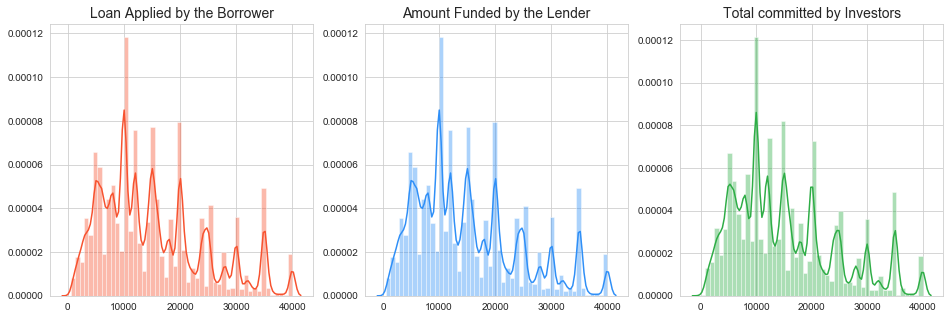

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))


df["loan_amount"] = df["loan_amount"].fillna(0)
df["funded_amount"] = df["funded_amount"].fillna(0)
df["investor_funds"] = df["investor_funds"].fillna(0)

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [104]:
# Lets' transform the issue dates by year.
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

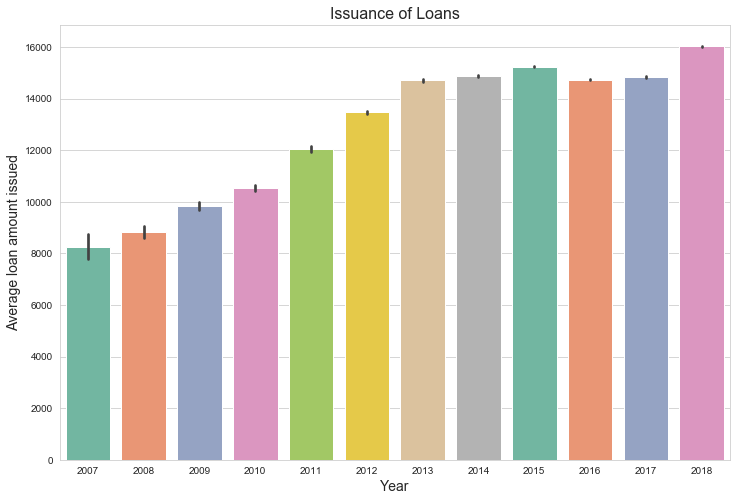

In [105]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=df, palette='Set2')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

<h1 align="center"> Good Loans vs Bad Loans: </h1>
<h2>Types of Loans: </h2>
<a id="types_of_loans"></a>

<br>
In this section, we will see what is the amount of bad loans Lending Club has declared so far, of course we have to understand that there are still loans that are at a risk of defaulting in the future. 

<h4> What we need to know: </h4>
<ul>
<li> The amount of bad loans could <b>increment</b> as the days pass by, since we still have a great amount of current loans. </li>
<li> <b>Average annual income</b> is an important key metric for finding possible opportunities of investments in a specific region. </li>

</ul>

<h4> Summary: </h4>
<ul>
<li> Currently, <b>bad loans</b> consist 7.60% of total loans but remember that we still have <b>current loans</b> which have the risk of becoming bad loans. (So this percentage is subjected to possible changes.) </li>
<li> The <b> NorthEast </b> region seems to be the most attractive in term of funding loans to borrowers. </li>
<li> The <b> SouthWest </b> and <b> West</b> regions have experienced a slight increase in the "median income" in the past years. </li> 
<li> <b>Average interest</b> rates have declined since 2012 but this might explain the <b>increase in the volume</b> of loans.  </li>
<li> <b>Employment Length</b> tends to be greater in the regions of the <b>SouthWest</b> and <b>West</b></li>
<li> Clients located in the regions of <b>NorthEast</b> and <b>MidWest</b> have not experienced a drastic increase in debt-to-income(dti) as compared to the other regions. </li>
</ul>

In [7]:
df["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [106]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%) of Total Loan Count')]

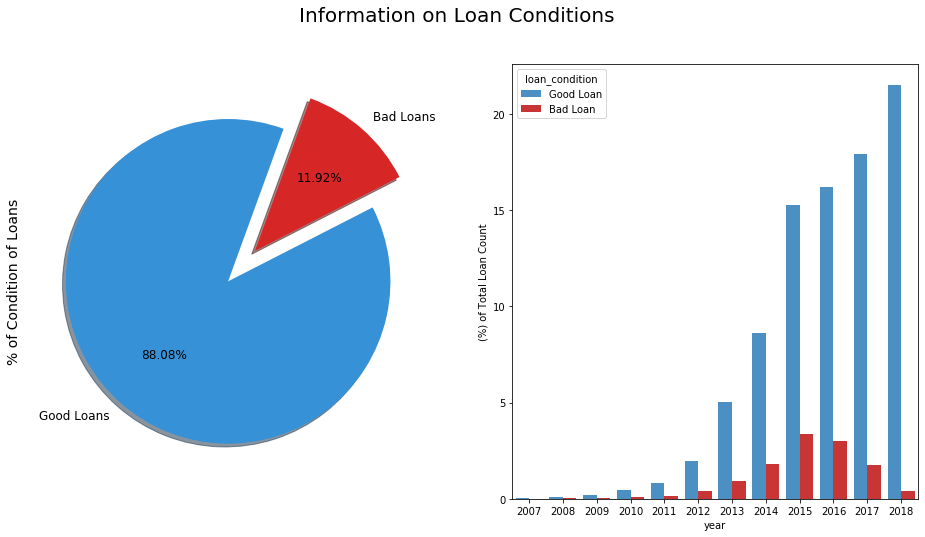

In [9]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x)/ len(df) * 100)
ax[1].set(ylabel="(%) of Total Loan Count")

<h2> Loans Issued by Region</h2>
<a id="by_region"></a>
In this section we want to analyze loans issued by region in order to see region patters that will allow us to understand which region gives Lending Club.<br><br>

## Summary: <br>
<ul>
<li> <b> SouthEast</b> , <b>West </b> and <b>NorthEast</b> regions had the highest amount lof loans issued. </li>
<li> <b>West </b> and <b>SouthWest </b> had a rapid increase in debt-to-income starting in 2012. </li>
<li><b>West </b> and <b>SouthWest </b>  had a rapid decrease in interest rates (This might explain the increase in debt to income). </li>
</ul>

In [107]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [108]:
# This code will take the current date and transform it into a year-month format
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])

Text(0.5, 1.0, 'Loans issued by Region')

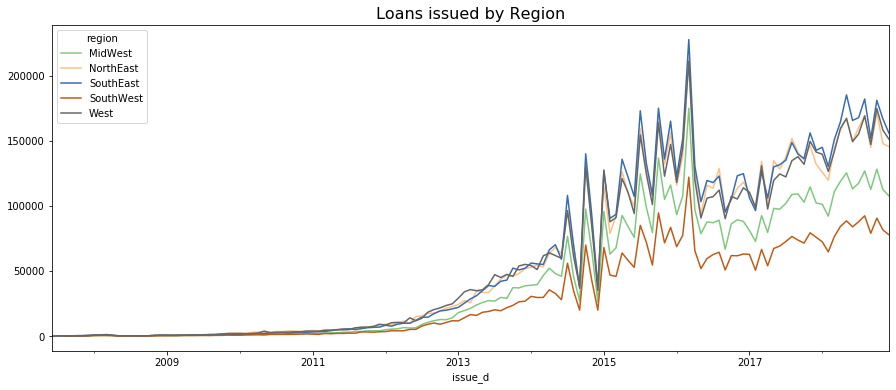

In [12]:
#plt.style.use('light_background')
cmap = plt.cm.Accent

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [13]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0
    
    
df.drop('emp_length', axis = 1, inplace = True)

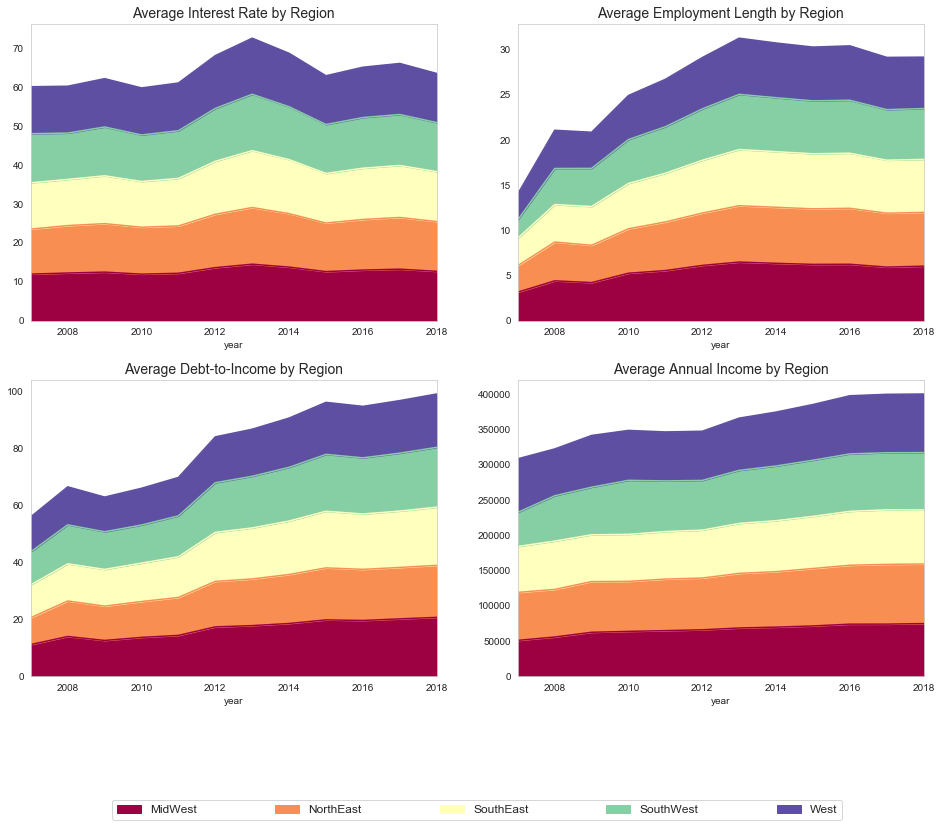

In [14]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.Spectral

by_interest_rate = df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

## A Deeper Look into Bad Loans:
<a id="deeper_bad_loans"></a>

<h4> What we need to know: </h4>
<ul> 
<li>The number of loans that were classified as bad loans for each region by its <b>loan status</b>. (This will be shown in a dataframe below.)</li>
<li> This won't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it will give us a <b> deeper insight on the level of risk </b> in a particular region. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li>The regions of the <b> West </b> and <b> SouthEast </b> had a higher percentage in most of the b "bad" loan statuses.</li>
<li> The <b>NorthEast</b> region had a higher percentage in <b>Grace Period</b> and <b>Does not meet Credit Policy</b> loan status. However, both of these are not considered as bad as <b>default</b> for instance. </li>
<li> Based on this small and brief summary we can conclude that the <b>West</b> and <b>SouthEast</b> regions have the most undesirable loan status, but just by a slightly higher percentage compared to the <b>NorthEast</b> region. </li>
<li> Again, this does not tell us what causes a loan to be a <b> bad loan </b>, but it gives us some idea about <b>the level of risk</b> within the regions across the United States. </li>
</ul>

In [15]:
# We have 67429 loans categorized as bad loans
badloans_df = df.loc[df["loan_condition"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
#loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
#loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
#loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status  Charged Off  Default  \
region                              
MidWest            46377        7   
NorthEast          62535       13   
SouthEast          67229        7   
SouthWest          32712        6   
West               59706        7   

loan_status  Does not meet the credit policy. Status:Charged Off  Total  
region                                                                   
MidWest                                                    142    46526  
NorthEast                                                  190    62738  
SouthEast                                                  184    67420  
SouthWest                                                   79    32797  
West                                                       166    59879

In [16]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
#grace_period = loan_status_cross['In Grace Period'].values.tolist()
#short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
#long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()



charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='turquoise'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='yellowgreen'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='lightblue'
    ),
    text = '%'
)

# grace = go.Bar(
#     x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
#     y= grace_period,
#     name='Grace Period',
#     marker = dict(
#         color='rgb(147, 147, 147)'
#     ),
#     text = '%'
# )

# short_pays = go.Bar(
#     x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
#     y= short_pay,
#     name='Late Payment (16-30 days)', 
#     marker = dict(
#         color='rgb(246, 157, 135)'
#     ),
#     text = '%'
# )

# long_pays = go.Bar(
#     x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
#     y= long_pay,
#     name='Late Payment (31-120 days)',
#     marker = dict(
#         color = 'rgb(238, 76, 73)'
#         ),
#     text = '%'
# )




data = [charged, defaults, credit_policy]#, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [17]:
# Average interest rates clients pay
print(df['interest_rate'].mean())
# Average annual income of clients
print(df['annual_income'].mean())

13.09282911511111
77992.4286870672


<h1 align="center"> The Business Perspective </h1>
<h2 > Understanding the Operative Side of Business </h2>
<a id="operative_side"></a>
<img src="http://bestcredit.sg/wp-content/uploads/2017/07/licensed-money-lender.jpg"><br><br>
Now we will have a closer look at the <b> operative side </b> of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!

<h4> What we need to know: </h4>
<ul>
<li> We will focus on <b>three key metrics</b>: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state. </li>
<li> The purpose of this analysis is to see states that give high returns at a descent risk. </li>

</ul>

<h4> Summary: </h4>
<ul>
<li> <b>California, Texas, New York and Florida</b> are the states in which the highest amount of loans were issued. </li>
<li> Interesting enough, all four states have a approximate <b>interest rate of 13%</b> which is at the same level of the average interest rate for all states (13.24%) </li>
<li> California, Texas and New York are <b>all above the average annual income</b> (with the exclusion of Florida), this might give possible indication why most loans are issued in these states. </li>
</ul>

In [18]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()



# Think of a way to add default rate
# Consider adding a few more metrics for the future

state_codes   issued_loans  interest_rate  annual_income
0          IA     114075.000         12.630      44756.210
1          IL 1410451950.000         12.960      79884.920
2          IN  550776675.000         13.180      70365.190
3          KS  283877825.000         13.000      71456.550
4          MI  841646100.000         13.160      71660.970

In [19]:
# Now it comes the part where we plot out plotly United States map
#import plotly.plotly as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## Analysis by Income Category:
<a id="income_category"></a>
In this section we will create different <b> income categories </b> in order to detect important patters and go more into depth in our analysis.

**What we need to know:** <br>
<ul>
<li><b>Low income category:</b> Borrowers that have an annual income lower or equal to 100,000 usd.</li>
<li> <b> Medium income category:</b> Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd. </li>
<li><b> High income category: </b> Borrowers that have an annual income higher tha 200,000 usd. </li>
</ul>

**Summary:**
<ul>
<li>Borrowers that made part of the <b>high income category</b> took higher loan amounts than people from <b>low</b> and <b>medium income categories.</b> Of course, people with higher annual incomes are more likely to pay loans with a higher amount. (First row to the left of the subplots) </li>
<li> Loans that were borrowed by the <b>Low income category</b> had a slightly higher change of becoming a bad loan. (First row to the right of the subplots) </li>
<li>Borrowers with <b>High</b> and <b> Medium</b> annual incomes had a longer employment length than people with lower incomes.(Second row to the left of the subplots) </li>
<li> Borrowers with a lower income had on average <b>higher interest rates</b> while people with a higher annual income had <b>lower interest rates</b> on their loans. (Second row to the right of the subplots)</li> 

</ul>

In [109]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [110]:
# Let's transform the column loan_condition into integers.

lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
df['loan_condition_int'] = df['loan_condition_int'].astype(int)

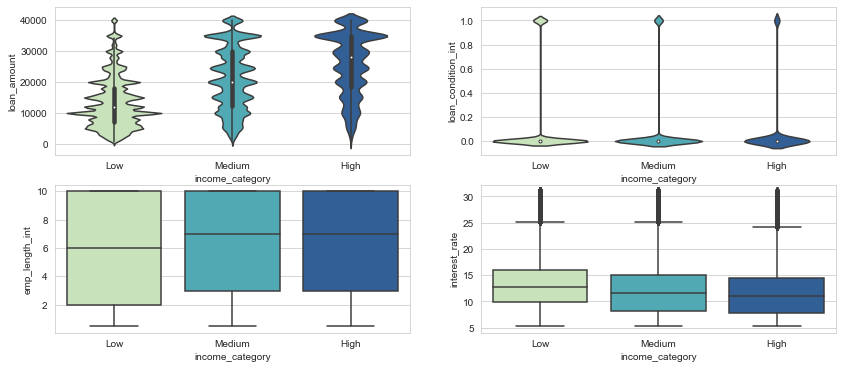

In [22]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=df, palette="YlGnBu", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="YlGnBu", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="YlGnBu", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=df, palette="YlGnBu", ax=ax4)

<h1 align="center"> Assesing Risks </h1>
<h2> Understanding the Risky side of Business </h2>
<a id="risky_side"></a>

Although the <b> operative side of business </b> is important, we have to also analyze the level of risk in each state. Credit scores are important metrics to analyze the level of risk of an individual customer. However, there are also other important metrics to somehow estimate the level of risk of other states. <br><br>

<h4> What we need to know: </h4>
<ul>
<li> <b>Debt-to-income</b> is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income. </li>
<li> The <b>average length of employment</b> tells us a better story about the labor market in each state which is helpful to assess the levelof risk. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li> <b>IOWA</b> has the highest level of default ratio neverthless, the amount of loans issued in that state is <b>too low</b>. (Number of Bad loans is equal to 3) </li>
<li> California and Texas seem to have the lowest risk and the highest possible return for investors. However, I will look more deeply into these states and create other metrics analyze the level of risk for each state. </li>

</ul>


**Note: I will be updating these section sooner or later (Stay in touch!)**

In [23]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/ df.groupby('addr_state')['loan_condition'].count()
by_emp_length = df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'] )

cross_condition = pd.crosstab(df["addr_state"], df["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)


# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Figure Number 2
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Figure 2 Dataframe 
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.head()

state_codes  default_ratio  badloans_amount  percentage_of_badloans  \
0          AK          0.136              628                   0.233   
1          AL          0.168             3934                   1.460   
2          AR          0.166             2426                   0.901   
3          AZ          0.136             6438                   2.390   
4          CA          0.140            38642                  14.346   

   average_dti  average_emp_length  
0       13.656               6.136  
1       18.739               6.463  
2       20.327               6.254  
3       20.414               5.680  
4       19.240               5.947

In [24]:
# Now it comes the part where we plot out plotly United States map
#import plotly.plotly as py
import plotly.graph_objs as go


for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## The Importance of Credit Scores:
<a id="credit_scores"></a>
Credit scores are important metrics for assesing the overall level of risk. In this section we will analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer.

<h4> What we need to know: </h4>
<ul> 
<li> The lower the grade of the credit score, the higher the risk for investors. </li>
<li> There are different factors that influence on the level of risk of the loan.</li>
</ul>

<h4> Summary: </h4>
<ul>
<li> The scores that has a lower grade received a larger amounts of loans (which might had contributed to a higher level of risk). </li>
<li> Logically, the <b>lower the grade the higher the interest</b> the customer had to pay back to investors.</li>
<li> Interstingly, customers with a <b>grade</b> of "C" were more likely to default on the loan </li>
<ul>

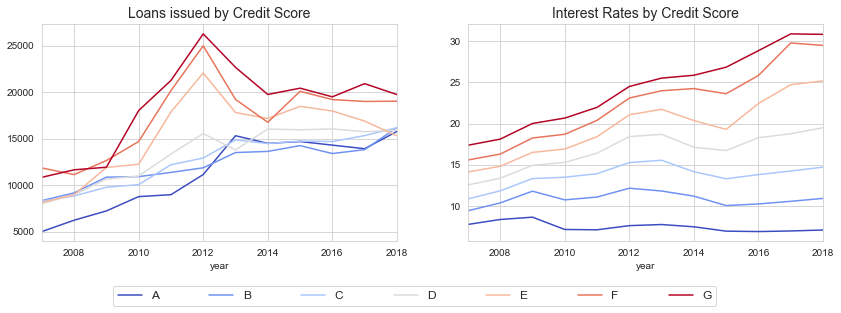

In [25]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

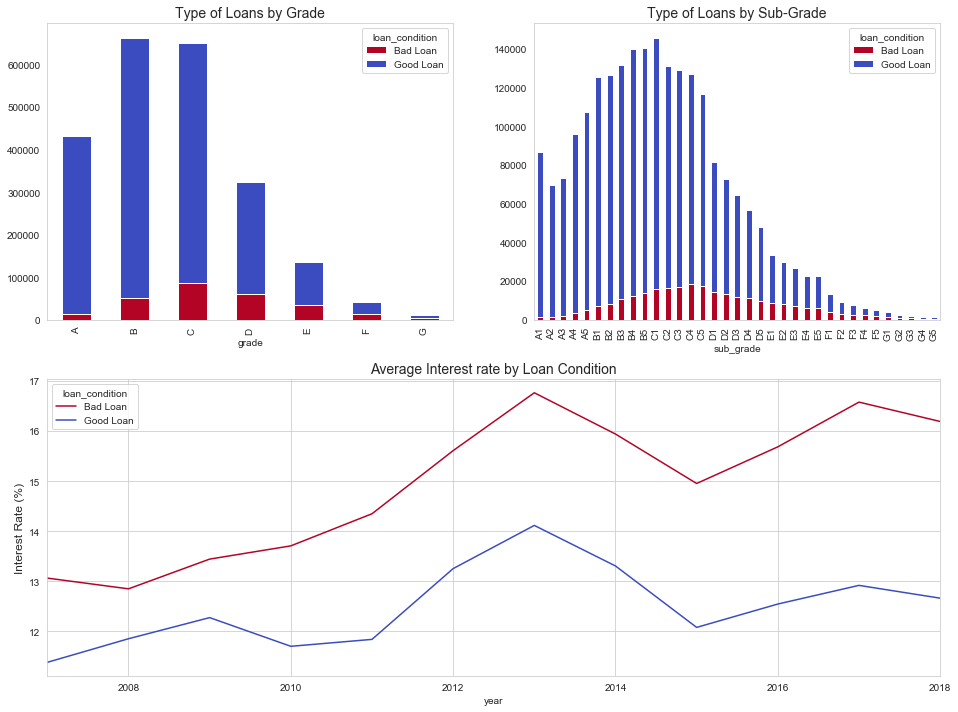

In [26]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

<h2>What Determines a Bad Loan </h2>
<a id="determines_bad_loan"></a>
My main aim in this section is to find the main factors that causes for a loan to be considered a <b>"Bad Loan"</b>. Logically, we could assume that factors such as a low credit grade or a high debt to income could be possible contributors in determining whether a loan is at a high risk of being defaulted. <br><br>

<h4> What we need to know: </h4>
<ul>
<li> There might be possible factors that contribute in whether a loan is bad or not. </li>
<li> Factors that increase risk include: low annual income, high debt to income, high interest rates, low grade, among others. </li>
</ul>

<h4> Summary: </h4>
<ul>
<li> The types of bad loans in the last year are having a tendency to<b> decline</b>, except for late payments (might indicate an economical recovery.) </li>
<li> <b>Mortgage </b> was the variable from the home ownership column that used the highest amount borrowed within loans that were considered to be bad.</li>
<li> There is a slight <b>increase</b> on people who have mortgages that are applying for a loan.</li>
<li>People who have a mortgage (depending on other factors as well within the mortgage) are more likely to ask for <bhigher loan amounts than other people who have other types of home ownerships. </li>
</ul>

In [27]:
# Just get me the numeric variables
numeric_variables = df.select_dtypes(exclude=["object"])

In [28]:
# We will use df_correlations dataframe to analyze our correlations.


df_correlations = df.corr()


trace = go.Heatmap(z=df_correlations.values,
                   x=df_correlations.columns,
                   y=df_correlations.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'], 
                              [0.1111111111111111, 'rgb(215,48,39)'], 
                              [0.2222222222222222, 'rgb(244,109,67)'], 
                              [0.3333333333333333, 'rgb(253,174,97)'], 
                              [0.4444444444444444, 'rgb(254,224,144)'], 
                              [0.5555555555555556, 'rgb(224,243,248)'], 
                              [0.6666666666666666, 'rgb(171,217,233)'], 
                              [0.7777777777777778, 'rgb(116,173,209)'], 
                              [0.8888888888888888, 'rgb(69,117,180)'], 
                              [1.0, 'rgb(49,54,149)']],
            colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
data=[trace]

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

This data looks a little but messy maybe if we focus our correlation heatmap into columns that are more worth it we might actually see a trend with the **condition of the loan**.

In [29]:
title = 'Bad Loans: Loan Statuses'

labels = bad_loan # All the elements that comprise a bad loan.

len(labels)
colors = ['rgba(236, 112, 99, 1)', 'rgba(235, 152, 78, 1)', 'rgba(52, 73, 94, 1)', 'rgba(128, 139, 150, 1)',
         'rgba(255, 87, 51, 1)', 'rgba(255, 195, 0, 1)']

mode_size = [8,8,8,8,8,8]

line_size = [2,2,2,2,2,2]

x_data = [
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()), 
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
]

# type of loans
charged_off = df['loan_amount'].loc[df['loan_status'] == 'Charged Off'].values.tolist()
defaults = df['loan_amount'].loc[df['loan_status'] == 'Default'].values.tolist()
not_credit_policy = df['loan_amount'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values.tolist()
# grace_period = df['loan_amount'].loc[df['loan_status'] == 'In Grace Period'].values.tolist()
# short_late = df['loan_amount'].loc[df['loan_status'] == 'Late (16-30 days)'].values.tolist()
# long_late = df['loan_amount'].loc[df['loan_status'] == 'Late (31-120 days)'].values.tolist()

y_data = [
    charged_off,
    defaults,
    not_credit_policy,
#    grace_period,
#     short_late,
#     long_late,
]

p_charged_off = go.Scatter(
    x = x_data[0],
    y = y_data[0],
    name = 'A. Charged Off',
    line = dict(
        color = colors[0],
        width = 3,
        dash='dash')
)

p_defaults = go.Scatter(
    x = x_data[1],
    y = y_data[1],
    name = 'A. Defaults',
    line = dict(
        color = colors[1],
        width = 3,
        dash='dash')
)

p_credit_policy = go.Scatter(
    x = x_data[2],
    y = y_data[2],
    name = 'Not Meet C.P',
    line = dict(
        color = colors[2],
        width = 3,
        dash='dash')
)

# p_graced = go.Scatter(
#     x = x_data[3],
#     y = y_data[3],
#     name = 'A. Graced Period',
#     line = dict(
#         color = colors[3],
#         width = 3,
#         dash='dash')
# )

# p_short_late = go.Scatter(
#     x = x_data[4],
#     y = y_data[4],
#     name = 'Late (16-30 days)',
#     line = dict(
#         color = colors[4],
#         width = 3,
#         dash='dash')
# )

# p_long_late = go.Scatter(
#     x = x_data[5],
#     y = y_data[5],
#     name = 'Late (31-120 days)',
#     line = dict(
#         color = colors[5],
#         width = 3,
#         dash='dash')
# )




data=[p_charged_off, p_defaults, p_credit_policy]#, p_graced, p_short_late, p_long_late]

layout = dict(title = 'Types of Bad Loans <br> (Amount Borrowed Throughout the Years)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Issued'),
              )

fig = dict(data=data, layout=layout)

iplot(fig, filename='line-mode')

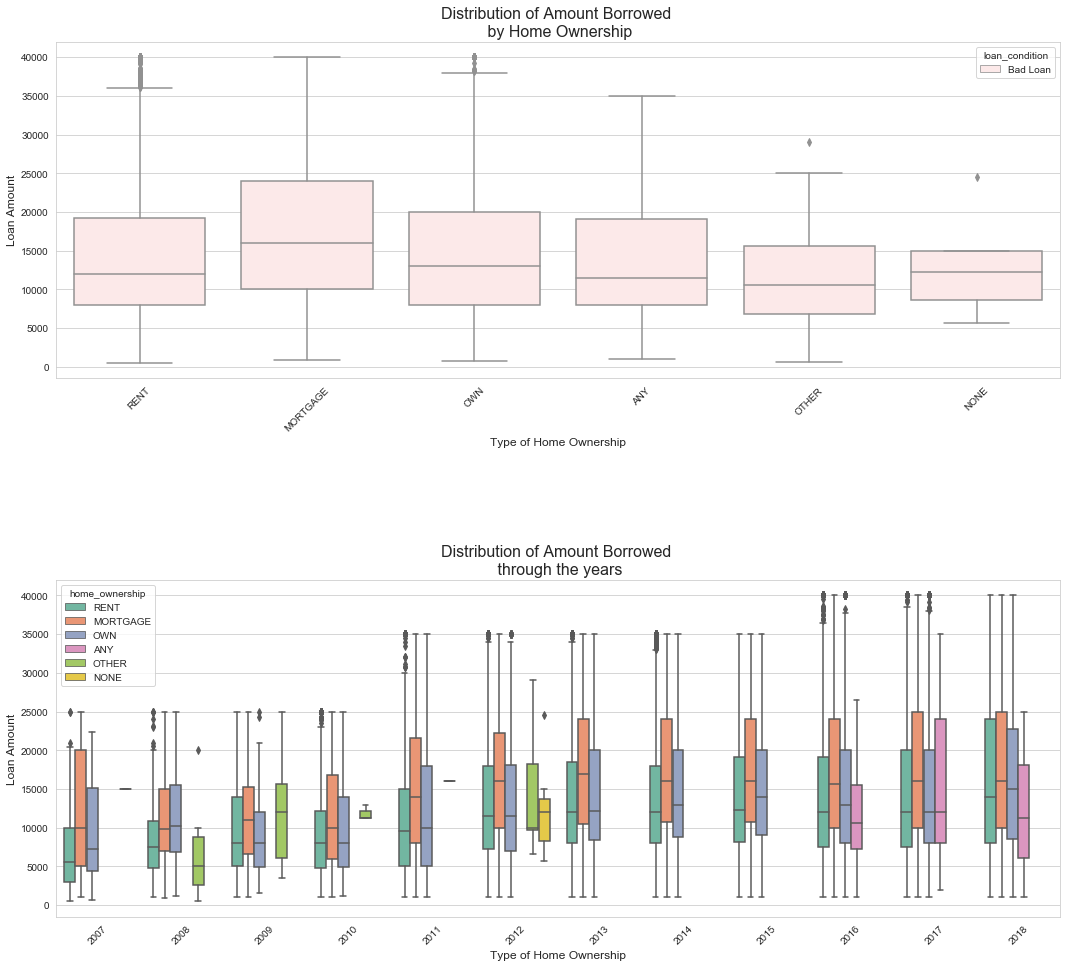

In [30]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df.loc[df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership',
               data=bad_df, palette="Set2")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

## Defaulted Loans and Level of Risk:
<a id="defaulted_loans"></a>
From all the bad loans the one we are most interested about are the loans that are defaulted. Therefore, in this section we will implement an in-depth analysis of these types of Loans and see if we can gain any insight as to which features have a high correlation with the loan being defaulted.

## Main Aim:
<ul>
<li> Determine patters that will allow us to understand somehow factors that contribute to a loan being <b>defaulted</b> </li>
</ul>

## Summary:
<ul>
<li>In the last year recorded, the <b>Midwest </b>  and <b> SouthEast </b> regions had the most defaults. </li>
<li>Loans that have a <b>high interest rate</b>(above 13.23%) are more likely to become a <b>bad loan </b>. </li>
<li>Loans that have a longer <b> maturity date (60 months) </b> are more likely to be a bad loan. </li>
</ul>



In [31]:

# Get the loan amount for loans that were defaulted by each region.
northe_defaults = df['loan_amount'].loc[(df['region'] == 'NorthEast') & (df['loan_status'] == 'Default')].values.tolist()
southw_defaults = df['loan_amount'].loc[(df['region'] == 'SouthWest') & (df['loan_status'] == 'Default')].values.tolist()
southe_defaults = df['loan_amount'].loc[(df['region'] == 'SouthEast') & (df['loan_status'] == 'Default')].values.tolist()
west_defaults = df['loan_amount'].loc[(df['region'] == 'West') & (df['loan_status'] == 'Default')].values.tolist()
midw_defaults = df['loan_amount'].loc[(df['region'] == 'MidWest') & (df['loan_status'] == 'Default')].values.tolist()

# Cumulative Values
y0_stck=northe_defaults
y1_stck=[y0+y1 for y0, y1 in zip(northe_defaults, southw_defaults)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(northe_defaults, southw_defaults, southe_defaults)]
y3_stck=[y0+y1+y2+y3 for y0, y1, y2, y3 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults)]
y4_stck=[y0+y1+y2+y3+y4 for y0, y1, y2, y3, y4 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults, midw_defaults)] 

# Make original values strings and add % for hover text
y0_txt=['$' + str(y0) for y0 in northe_defaults]
y1_txt=['$' + str(y1) for y1 in southw_defaults]
y2_txt=['$' + str(y2) for y2 in southe_defaults]
y3_txt=['$' + str(y3) for y3 in west_defaults]
y4_txt=['$'+ str(y4) for y4 in midw_defaults]

year = sorted(df["year"].unique().tolist())

NorthEast_defaults = go.Scatter(
    x= year,
    y= y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    name='NorthEast',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(131, 90, 241)'),
    fill='tonexty'
)
SouthWest_defaults = go.Scatter(
    x=year,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    name='SouthWest',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(255, 140, 0)'),
    fill='tonexty'
)

SouthEast_defaults = go.Scatter(
    x= year,
    y= y2_stck,
    text=y2_txt,
    hoverinfo='x+text',
    name='SouthEast',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(240, 128, 128)'),
    fill='tonexty'
)

West_defaults = go.Scatter(
    x= year,
    y= y3_stck,
    text=y3_txt,
    hoverinfo='x+text',
    name='West',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(135, 206, 235)'),
    fill='tonexty'
)

MidWest_defaults = go.Scatter(
    x= year,
    y= y4_stck,
    text=y4_txt,
    hoverinfo='x+text',
    name='MidWest',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(240, 230, 140)'),
    fill='tonexty'
    )


data = [NorthEast_defaults, SouthWest_defaults, SouthEast_defaults, West_defaults, MidWest_defaults]

layout = dict(title = 'Amount Defaulted by Region',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Defaulted')
             )

fig = dict(data=data, layout=layout)
              
iplot(fig, filename='basic-area-no-bound')

In [32]:
df['interest_rate'].describe()
# Average interest is 13.26% Anything above this will be considered of high risk let's see if this is true.
df['interest_payments'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['interest_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['interest_rate'] > 13.23, 'interest_payments'] = 'High'
    
df.head()

loan_amount  funded_amount  investor_funds        term  interest_rate  \
0     3600.000       3600.000        3600.000   36 months         13.990   
1    24700.000      24700.000       24700.000   36 months         11.990   
2    20000.000      20000.000       20000.000   60 months         10.780   
3    35000.000      35000.000       35000.000   60 months         14.850   
4    10400.000      10400.000       10400.000   60 months         22.450   

   installment grade sub_grade home_ownership  annual_income  ...  \
0      123.030     C        C4       MORTGAGE      55000.000  ...   
1      820.280     C        C1       MORTGAGE      65000.000  ...   
2      432.660     B        B4       MORTGAGE      63000.000  ...   
3      829.900     C        C5       MORTGAGE     110000.000  ...   
4      289.910     F        F1       MORTGAGE     104433.000  ...   

  settlement_percentage settlement_term  year loan_condition     region  \
0                   nan             nan  2015      Good Loan  NorthEast   
1                   nan             nan  2015      Good Loan    MidWest   
2                   nan             nan  2015      Good Loan    MidWest   
3                   nan             nan  2015      Good Loan  NorthEast   
4                   nan             nan  2015      Good Loan  NorthEast   

  complete_date  emp_length_int  income_category loan_condition_int  \
0    2015-12-01          10.000              Low                  0   
1    2015-12-01          10.000              Low                  0   
2    2015-12-01          10.000              Low                  0   
3    2015-12-01          10.000           Medium                  0   
4    2015-12-01           3.000           Medium                  0   

   interest_payments  
0               High  
1                Low  
2                Low  
3               High  
4               High  

[5 rows x 149 columns]

In [33]:
df['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

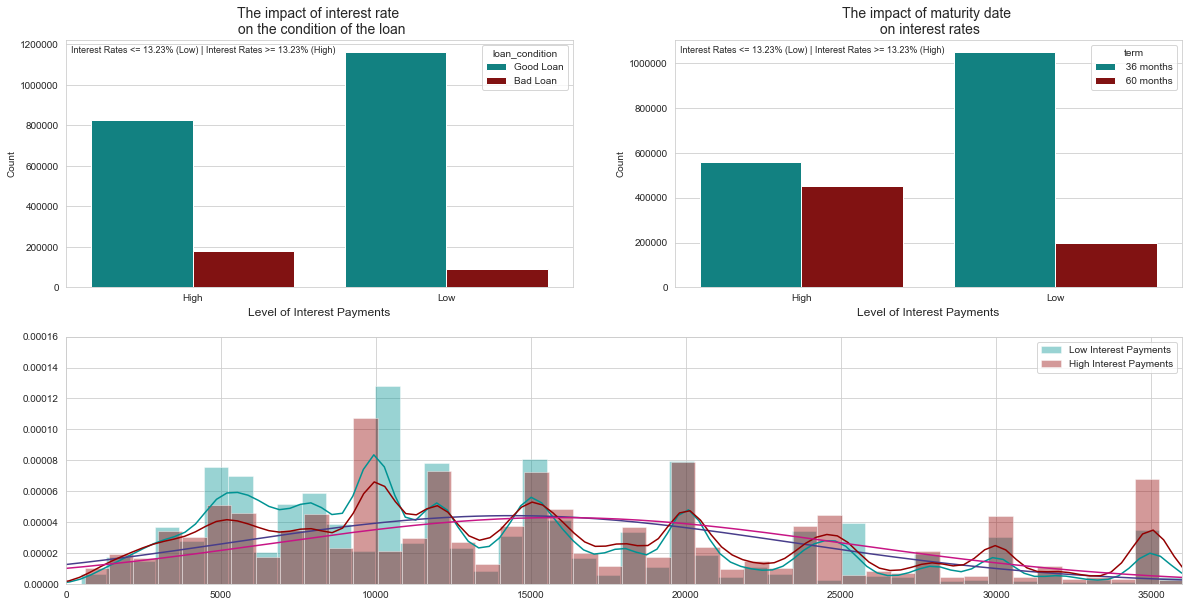

In [34]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df, 
                  palette=palette, hue='loan_condition')
ax.text(0.01, .95, 'Interest Rates <= 13.23% (Low) | Interest Rates >= 13.23% (High)', fontsize=9, transform=ax.transAxes)

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df, 
                   palette=palette, hue='term')

ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')
ax1.text(1.21, .95, 'Interest Rates <= 13.23% (Low) | Interest Rates >= 13.23% (High)', fontsize=9, transform=ax.transAxes)



plt.subplot(212)
low = df['loan_amount'].loc[df['interest_payments'] == 'Low'].values
high = df['loan_amount'].loc[df['interest_payments'] == 'High'].values


ax2= sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) # Dark Blue Norm Color
ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color":"#c71585"}) #  Red Norm Color
plt.axis([0, 36000, 0, 0.00016])
plt.legend()



plt.show()

## Risk Assesment:
The main aim in this section is to compare the average interest rate for the loan status belonging to each type of loans (Good loan or bad loan) and see if there is any significant difference in the average of interest rate for each of the groups.

## Summary: 
<ul>
<li> <b> Bad Loans: </b>  Most of the loan statuses belonging to this group pay a interest ranging from 15% - 16%. </li>
<li><b>Good Loans:</b> Most of the loan statuses belonging to this group pay interest ranging from 12% - 13%.  </li>
<li>There has to be a better assesment of risk since there is not that much of a difference in interest payments from <b>Good Loans</b> and <b>Bad Loans</b>. </li>
<li> Remember, most loan statuses are <b>Current</b> so there is a risk that at the end of maturity some of these loans might become bad loans. </li>
</ul>

<br>


In [35]:
#import plotly.plotly as py
import plotly.graph_objs as go

# Interest rate good loans
avg_fully_paid = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Fully Paid'].values), 2)
avg_current = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Current'].values), 2) 
avg_issued = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Issued'].values), 2)
avg_long_fully_paid = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'].values), 2)
avg_grace_period = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'In Grace Period'].values), 2)
avg_short_late = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Late (16-30 days)'].values), 2)
avg_long_late = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Late (31-120 days)'].values), 2)



# Interest rate bad loans

avg_default_rates = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Default'].values), 2)
avg_charged_off = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Charged Off'].values), 2)
avg_long_charged_off = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values), 2)


# Take to a dataframe

data = [
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_fully_paid, avg_current, avg_issued, avg_long_fully_paid, avg_grace_period, avg_short_late, avg_long_late],
      theta = ['Fully Paid', 'Current', 'Issued', 'No C.P. Fully Paid','In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      fill = 'toself',
      name = 'Good Loans',
        line = dict(
        color = "#63AF63"
      ),
      marker = dict(
        color = "#B3FFB3",
        symbol = "square",
        size = 8
      ),
      subplot = "polar",
    ),
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_default_rates, avg_charged_off, avg_long_charged_off],
      theta = ['Default Rate', 'Charged Off', 'C.P. Charged Off'], 
      fill = 'toself',
      name = 'Bad Loans',
        line = dict(
        color = "#C31414"
      ),
      marker = dict(
        color = "#FF5050",
        symbol = "square",
        size = 8
      ),
      subplot = "polar2"
    )
]

layout = go.Layout(
    title="Average Interest Rates <br> Loan Status Distribution",
    showlegend = False,
     paper_bgcolor = "rgb(255, 248, 243)",
    polar = dict(
      domain = dict(
        x = [0,0.4],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 8
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 90,
        direction = "counterclockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0.6,1],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 8
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 90,
        direction = "clockwise"
      ),
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar/directions')

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



## Condition of Loans and Purpose:
<a id="loan_condition"></a>
In this section we will go into depth regarding the <b>reasons for clients to apply for a loan. </b> Our main aim is to see if there are purposes that contribute to a <b> "higher" </b> risk whether the loan will be repaid or not.

### Summary: 
<ul>
<li> <b>Bad Loans Count: </b> People that apply for educational and small business purposed tend to have a higher risk of being a bad loan. (% wise) </li>
<li><b>Most frequent Purpose: </b> The reason that clients applied the most for a loan was to consolidate debt. </li>
<li><b>Less frequent purpose:</b> Clients applied less for educational purposes for all three income categories.  </li>
<li><b>Interest Rates: </b> In all reasons for application except (medical, small business and credi card), the low income category has a higher interest rate. Something that could possibly explain this is the amount of capital that is needed from other income categories that might explain why the low income categories interest rate for these puposes are lower.  </li>
<li><b>Bad/Good Ratio:</b> Except for educational purposes (we see a spike in high income this is due to the reasons that only two loans were issued and one was a bad loan which caused this ratio to spike to 50%.), but we can see that in all other purposed the bad good ratio is lower the higher your income category.  </li>

</ul>

In [36]:
df['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='ivory',
    plot_bgcolor='ivory',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

In [37]:
# Average interest by income category and purposes 
# Which purpose carries a higher interest rate and does income category have an influence on risk?
# Is LendingClub deploying loan amount where there is a high risk (interest_rate)
# Remember we learned that interest_rates is a key metric in evaluating risk.



group_income_purpose = df.groupby(['income_category', 'purpose'], as_index=False).interest_rate.mean()
group_dti_purpose = df.groupby(['income_category', 'purpose'], as_index=False).loan_amount.mean()
loan_a = group_dti_purpose['loan_amount'].values



# High Car 10.32 15669
new_groupby = group_income_purpose.assign(total_loan_amount=loan_a)
sort_group_income_purpose = new_groupby.sort_values(by="income_category", ascending=True)

In [38]:
loan_count = df.groupby(['income_category', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts())
d={"loan_c": loan_count}
loan_c_df = pd.DataFrame(data=d).reset_index()
loan_c_df = loan_c_df.rename(columns={"level_2": "loan_condition"})


# Good loans & Bad Loans
good_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Good Loan"].sort_values(by="income_category", ascending=True)
bad_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Bad Loan"].sort_values(by="income_category", ascending=True)
sort_group_income_purpose['good_loans_count'] = good_loans['loan_c'].values
sort_group_income_purpose['bad_loans_count'] = bad_loans['loan_c'].values
sort_group_income_purpose['total_loans_issued'] = (good_loans['loan_c'].values + bad_loans['loan_c'].values)
sort_group_income_purpose['bad/good ratio (%)'] = np.around(bad_loans['loan_c'].values / (bad_loans['loan_c'].values + good_loans['loan_c'].values), 4) * 100
final_df = sort_group_income_purpose.sort_values(by='income_category', ascending=True)
final_df.style.background_gradient('coolwarm')

In [39]:
final_df = final_df.sort_values(by="purpose", ascending=False)

In [40]:
# Work on a plot to explain better the correlations between the different columns in final_df dataframe.
# We will do a Subplot in Plotly with 

#import plotly.plotly as py
import plotly.graph_objs as go

# Labels
purpose_labels = df['purpose'].unique()

# Average Interest Rate Dot Plots # 1st Subplot
high_income = final_df['interest_rate'].loc[final_df['income_category'] == 'High'].values.tolist()
medium_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Medium'].values.tolist()
low_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Low'].values.tolist()

high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]



trace1 = {"x": high_lst,
          "y": purpose_labels,
          "marker": {"color": "#0040FF", "size": 16},
          "mode": "markers",
          "name": "High Income",
          "type": "scatter"
}

trace2 = {"x": med_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE9A2E", "size": 16},
          "mode": "markers",
          "name": "Medium Income",
          "type": "scatter",
}

trace3 = {"x": low_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE2E2E", "size": 16},
          "mode": "markers",
          "name": "Low Income",
          "type": "scatter",
}




data = [trace1, trace2, trace3]
layout = {"title": "Average Purpose Interest Rate <br> <i> by Income Category </i> ",
          "xaxis": {"title": "Average Interest Rate", },
          "yaxis": {"title": ""}}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [41]:
# Labels
purpose_labels = final_df['purpose'].unique()

# Amount of Good and Bad Loans per Purpose (fill by income category)
# Good Loans
good_high_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "High"].values.tolist()
good_med_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "Medium"].values.tolist()
good_low_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "Low"].values.tolist()

# Bad Loans
bad_high_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "High"].values.tolist()
bad_med_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "Medium"].values.tolist()
bad_low_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "Low"].values.tolist()


# Good Loans
trace0 = go.Bar(
    y=purpose_labels,
    x=good_high_cnt,
    legendgroup='a',
    name='High Income',
    orientation='h', 
    marker=dict(
        color='#0040FF'
    )
)
trace1 = go.Bar(
    x=good_med_cnt,
    y=purpose_labels,
    legendgroup='a',
    name='Medium Income',
    orientation='h',
    marker=dict(
        color='#FE9A2E',
    )
)

trace2 = go.Bar(
    x=good_low_cnt,
    y=purpose_labels,
    legendgroup='a',
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#FE2E2E',
    )
)

# Bad Loans issued by Income Category
trace3 = go.Bar(
    y=purpose_labels,
    x=bad_high_cnt,
    legendgroup='b',
    showlegend=False,
    name='High Income',
    orientation='h', 
    marker=dict(
        color='#0040FF'
    )
)
trace4 = go.Bar(
    x=bad_med_cnt,
    y=purpose_labels,
    legendgroup='b',
    showlegend=False,
    name='Medium Income',
    orientation='h',
    marker=dict(
        color='#FE9A2E',
    )
)

trace5 = go.Bar(
    x=bad_low_cnt,
    y=purpose_labels,
    legendgroup='b',
    showlegend=False,
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#FE2E2E',
    )
)



fig = tools.make_subplots(rows=2, cols=1, print_grid=False,
                         subplot_titles=("Amount of <br> <i>Good Loans Issued</i>",
                                        "Amount of <br> <i>Bad Loans Issued</i>")
                         )

# First Subplot
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# Second Subplot
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 1)

fig['layout'].update(height=800, width=800, title='Issuance of Loans', showlegend=True, xaxis=dict(title="Number of Loans Issued"))
iplot(fig, filename='angled-text-bar')

/usr/local/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [42]:
# Next task a Radar Chart with the bad/good ratio to see if it justifies the amount of loans issued towards housing
high_ratio = final_df.loc[final_df['income_category'] == 'High']
medium_ratio = final_df.loc[final_df['income_category'] == 'Medium']
low_ratio = final_df.loc[final_df['income_category'] == 'Low']

data = [
    go.Scatterpolar(
        mode='lines+markers',
      r = high_ratio['bad/good ratio (%)'].values.tolist(),
      theta = high_ratio['purpose'].unique(),
      fill = 'toself',
      name = 'High Income',
        line = dict(
        color = "#63AF63"
      ),
      marker = dict(
        color = "#B3FFB3",
        symbol = "square",
        size = 8
      ),
      subplot = "polar",
    ),
    go.Scatterpolar(
        mode='lines+markers',
      r = medium_ratio['bad/good ratio (%)'].values.tolist(),
      theta = medium_ratio['purpose'].unique(),
      fill = 'toself',
      name = 'Medium Income',
        line = dict(
        color = "#C31414"
      ),
      marker = dict(
        color = "#FF5050",
        symbol = "square",
        size = 8
      ),
      subplot = "polar2"
    ),
    go.Scatterpolar(
        mode='lines+markers',
      r = low_ratio['bad/good ratio (%)'].values.tolist(),
      theta = low_ratio['purpose'].unique(),
      fill = 'toself',
      name = 'Low Income',
        line = dict(
        color = "#C9FFC7"
      ),
      marker = dict(
        color = "#8CB28B",
        symbol = "square",
        size = 8
      ),
      subplot = "polar3"
    ),
]

layout = go.Layout(
    title="Bad/Good Ratio <br> (By Purpose)",
    showlegend = False,
     paper_bgcolor = "rgb(255, 206, 153)",
    polar = dict(
      domain = dict(
        x = [0,0.3],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 6
        ),
        rotation = 90,
        direction = "counterclockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0.35,0.65],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 6
        ),
        rotation = 85,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
        x = [0.7, 1],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 6
        ),
        rotation = 90,
        direction = "clockwise"
      ),
    ))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "radar/multiple")

## Feature Engineering:
**Steps:**
<ul>
<li> There are <b> features </b> that are redundant (as show in the beginning of this kernel in the distribution subplots) having no effect towards the "loan_condition" label so we need to <b> drop these features</b>.</li>
<li>There are considerable amounts of null values. Those need to be addressed before running the data through the data pipeline.<br>
<li> Use <b>StrattifiedShuffleSplit</b> to have approximately the same ratio of bad loans compared to good loans in both training and testing data. Remember that over 92% of the loans are considered good loans so it is important to have this same ration across training and testing sets. </li>
<li> <b>Scale </b> numeric features and <b>encode</b> categorical features from our dataframe. </li>


In [43]:
df.to_csv('df.csv', index = False)

In [44]:
# If you want to skip to this:

#df = pd.read_csv('df.csv', low_memory = False)

In [111]:
complete_df = df.copy()

In [46]:
complete_df.loan_condition.unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

#### Dealing with Null Values:
1) Find those variables with more than 20% nulls
2) Compare list of null counts across good vs bad loans to make sure the same variables meet that threshold in the good group as in the bad
3) Evaluate nulls by 

In [112]:
#Whole dataset null count

nulls = pd.DataFrame(round(complete_df.isnull().sum()/len(complete_df.index)*100,2),columns=['null_percent'])
 
null_prct = nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)
null_prct

null_percent
orig_projected_additional_accrued_interest        99.620
hardship_payoff_balance_amount                    99.520
hardship_loan_status                              99.520
hardship_dpd                                      99.520
hardship_last_payment_amount                      99.520
hardship_length                                   99.520
payment_plan_start_date                           99.520
hardship_end_date                                 99.520
hardship_start_date                               99.520
hardship_amount                                   99.520
deferral_term                                     99.520
hardship_status                                   99.520
hardship_reason                                   99.520
hardship_type                                     99.520
settlement_term                                   98.490
debt_settlement_flag_date                         98.490
settlement_status                                 98.490
settlement_date                                   98.490
settlement_amount                                 98.490
settlement_percentage                             98.490
sec_app_mths_since_last_major_derog               98.410
sec_app_revol_util                                95.300
sec_app_chargeoff_within_12_mths                  95.220
sec_app_num_rev_accts                             95.220
sec_app_open_act_il                               95.220
sec_app_open_acc                                  95.220
sec_app_mort_acc                                  95.220
sec_app_inq_last_6mths                            95.220
sec_app_collections_12_mths_ex_med                95.220
sec_app_earliest_cr_line                          95.220
revol_bal_joint                                   95.220
verification_status_joint                         94.880
annual_inc_joint                                  94.660
dti_joint                                         94.660
mths_since_last_record                            84.110
mths_since_recent_bc_dlq                          77.010
mths_since_last_major_derog                       74.310
mths_since_recent_revol_delinq                    67.250
next_pymnt_d                                      59.510
mths_since_last_delinq                            51.250
il_util                                           47.280
mths_since_rcnt_il                                40.250
all_util                                          38.320
open_act_il                                       38.310
open_acc_6m                                       38.310
open_il_24m                                       38.310
open_il_12m                                       38.310
total_cu_tl                                       38.310
total_bal_il                                      38.310
open_rv_12m                                       38.310
open_rv_24m                                       38.310
max_bal_bc                                        38.310
inq_fi                                            38.310
inq_last_12m                                      38.310
mths_since_recent_inq                             13.070
num_tl_120dpd_2m                                   6.800
emp_length                                         6.500
mo_sin_old_il_acct                                 6.150
bc_util                                            3.360
percent_bc_gt_75                                   3.330
bc_open_to_buy                                     3.310
mths_since_recent_bc                               3.250
pct_tl_nvr_dlq                                     3.120
num_actv_rev_tl                                    3.110
tot_coll_amt                                       3.110
tot_cur_bal                                        3.110
total_rev_hi_lim                                   3.110
avg_cur_bal                                        3.110
mo_sin_old_rev_tl_op                               3.110
mo_sin_rcnt_rev_tl_op                              3.1

In [122]:
len(null_prct[null_prct['null_percent']>20])

54

In [48]:
#Good Loans dataset null count

nulls_good = pd.DataFrame(round(complete_df[complete_df.loan_condition == 'Good Loan'].isnull().sum()/len(complete_df[complete_df.loan_condition == 'Good Loan'].index)*100,2),columns=['null_percent'])

null_prct_good = nulls_good[nulls_good['null_percent']!=0.00].sort_values('null_percent',ascending=False)
null_prct_good

null_percent
settlement_date                                   99.950
settlement_term                                   99.950
settlement_percentage                             99.950
settlement_amount                                 99.950
settlement_status                                 99.950
debt_settlement_flag_date                         99.950
orig_projected_additional_accrued_interest        99.670
hardship_amount                                   99.660
hardship_start_date                               99.660
hardship_end_date                                 99.660
hardship_length                                   99.660
payment_plan_start_date                           99.660
hardship_status                                   99.660
hardship_dpd                                      99.660
hardship_loan_status                              99.660
hardship_last_payment_amount                      99.660
deferral_term                                     99.660
hardship_payoff_balance_amount                    99.660
hardship_reason                                   99.660
hardship_type                                     99.660
sec_app_mths_since_last_major_derog               98.300
sec_app_revol_util                                94.890
sec_app_earliest_cr_line                          94.810
sec_app_collections_12_mths_ex_med                94.810
sec_app_chargeoff_within_12_mths                  94.810
sec_app_num_rev_accts                             94.810
sec_app_open_act_il                               94.810
sec_app_open_acc                                  94.810
sec_app_mort_acc                                  94.810
sec_app_inq_last_6mths                            94.810
...                                                  ...
total_il_high_credit_limit                         2.970
num_op_rev_tl                                      2.970
tot_coll_amt                                       2.970
tot_cur_bal                                        2.970
total_rev_hi_lim                                   2.970
mo_sin_old_rev_tl_op                               2.970
mo_sin_rcnt_rev_tl_op                              2.970
mo_sin_rcnt_tl                                     2.970
num_accts_ever_120_pd                              2.970
num_actv_rev_tl                                    2.970
num_bc_tl                                          2.970
num_actv_bc_tl                                     2.970
num_rev_accts                                      2.970
num_rev_tl_bal_gt_0                                2.970
num_tl_30dpd                                       2.970
num_tl_90g_dpd_24m                                 2.970
num_tl_op_past_12m                                 2.970
tot_hi_cred_lim                                    2.970
num_sats                                           2.490
num_bc_sats                                        2.490
total_bal_ex_mort                                  2.130
total_bc_limit                                     2.130
mort_acc                                           2.130
acc_open_past_24mths                               2.130
revol_util                                         0.080
dti                                                0.080
pub_rec_bankruptcies                               0.050
collections_12_mths_ex_med                         0.010
last_pymnt_d                                       0.010
chargeoff_within_12_mths                           0.010

[95 rows x 1 columns]

In [49]:
#Bad Loans dataset null count

nulls_bad = pd.DataFrame(round(complete_df[complete_df.loan_condition == 'Bad Loan'].isnull().sum()/len(complete_df[complete_df.loan_condition == 'Bad Loan'].index)*100,2),columns=['null_percent'])

null_prct_bad = nulls_bad[nulls_bad['null_percent']!=0.00].sort_values('null_percent',ascending=False)
null_prct_bad

null_percent
next_pymnt_d                                      99.700
sec_app_mths_since_last_major_derog               99.250
orig_projected_additional_accrued_interest        99.200
hardship_reason                                   98.490
hardship_status                                   98.490
hardship_loan_status                              98.490
hardship_dpd                                      98.490
hardship_length                                   98.490
payment_plan_start_date                           98.490
hardship_end_date                                 98.490
hardship_start_date                               98.490
hardship_amount                                   98.490
deferral_term                                     98.490
hardship_payoff_balance_amount                    98.490
hardship_type                                     98.490
hardship_last_payment_amount                      98.490
sec_app_revol_util                                98.340
sec_app_mort_acc                                  98.280
sec_app_collections_12_mths_ex_med                98.280
sec_app_chargeoff_within_12_mths                  98.280
sec_app_num_rev_accts                             98.280
sec_app_open_act_il                               98.280
sec_app_open_acc                                  98.280
sec_app_earliest_cr_line                          98.280
sec_app_inq_last_6mths                            98.280
revol_bal_joint                                   98.280
verification_status_joint                         97.650
dti_joint                                         97.640
annual_inc_joint                                  97.640
settlement_term                                   87.640
...                                                  ...
mo_sin_rcnt_rev_tl_op                              4.110
mo_sin_rcnt_tl                                     4.110
total_rev_hi_lim                                   4.110
tot_cur_bal                                        4.110
num_actv_bc_tl                                     4.110
num_actv_rev_tl                                    4.110
num_op_rev_tl                                      4.110
num_bc_tl                                          4.110
num_rev_tl_bal_gt_0                                4.110
num_tl_30dpd                                       4.110
num_tl_90g_dpd_24m                                 4.110
num_tl_op_past_12m                                 4.110
tot_coll_amt                                       4.110
tot_hi_cred_lim                                    4.110
bc_util                                            3.990
percent_bc_gt_75                                   3.960
bc_open_to_buy                                     3.930
mths_since_recent_bc                               3.860
num_bc_sats                                        3.350
num_sats                                           3.350
acc_open_past_24mths                               2.840
total_bc_limit                                     2.840
mort_acc                                           2.840
total_bal_ex_mort                                  2.840
last_pymnt_d                                       0.860
pub_rec_bankruptcies                               0.120
revol_util                                         0.070
dti                                                0.030
chargeoff_within_12_mths                           0.010
collections_12_mths_ex_med                         0.010

[95 rows x 1 columns]

In [50]:
#The variables with >20% nulls are the same for both good and bad subsets

rm_good = list(null_prct_good[null_prct_good.null_percent > 20].index)
rm_bad = list(null_prct_bad[null_prct_bad.null_percent > 20].index)

print(len(rm_good))
print(len(rm_bad))
print(list(set(rm_good)-set(rm_bad)))
print(list(set(rm_good).symmetric_difference(set(rm_bad))))


54
54
[]
[]


In [51]:
rm_good

['settlement_date',
 'settlement_term',
 'settlement_percentage',
 'settlement_amount',
 'settlement_status',
 'debt_settlement_flag_date',
 'orig_projected_additional_accrued_interest',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'payment_plan_start_date',
 'hardship_status',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_last_payment_amount',
 'deferral_term',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_type',
 'sec_app_mths_since_last_major_derog',
 'sec_app_revol_util',
 'sec_app_earliest_cr_line',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_num_rev_accts',
 'sec_app_open_act_il',
 'sec_app_open_acc',
 'sec_app_mort_acc',
 'sec_app_inq_last_6mths',
 'revol_bal_joint',
 'verification_status_joint',
 'annual_inc_joint',
 'dti_joint',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 

In [52]:
#Dropping above variables

print(complete_df.shape)
complete_df.drop(rm_good, axis=1, inplace=True)
print(complete_df.shape)

(2260668, 149)
(2260668, 95)


In [53]:
#termining other unnecessaries to drop: loan_condition cause we have loan_condition_int flag
complete_df.drop(['loan_condition','complete_date'], axis=1, inplace = True)

list(complete_df.columns.sort_values().values)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'annual_income',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'disbursement_method',
 'dti',
 'earliest_cr_line',
 'emp_length_int',
 'fico_range_high',
 'fico_range_low',
 'funded_amount',
 'grade',
 'hardship_flag',
 'home_ownership',
 'income_category',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'interest_payments',
 'interest_rate',
 'investor_funds',
 'issue_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amount',
 'loan_condition_int',
 'loan_status',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl'

In [54]:
complete_df.isnull().sum()

loan_amount                        0
funded_amount                      0
investor_funds                     0
term                               0
interest_rate                      0
installment                        0
grade                              0
sub_grade                          0
home_ownership                     0
annual_income                      4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                         0
dti                             1711
delinq_2yrs                       29
earliest_cr_line                  29
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                    30
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                      1802
total_acc                         29
i

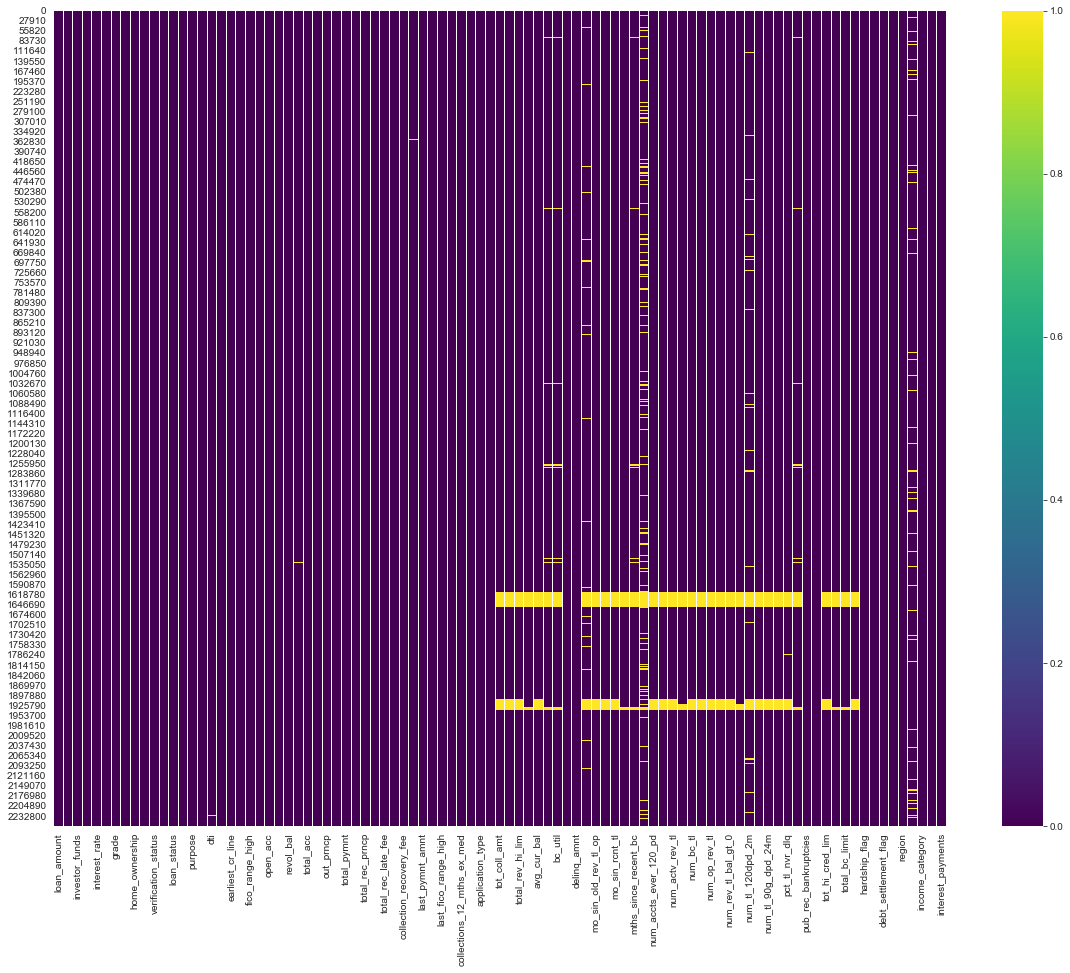

In [55]:
#Visualizing the distribution of nulls
complete_df = complete_df.reset_index(drop=True) #resetting index for easier row identification

fig = plt.figure(figsize=(20,15))
sns.heatmap(complete_df.isna(),cmap='viridis')

#As we can see here nulls are concentrated in two small grouping of rows. 
#The trick will be finding those rows and removing them

In [56]:
import gc

gc.collect()

71710

In [57]:
#Resetting index due to boxing of row issues below

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)

In [58]:
#Finding rows with 'high null density' to decide if they should be removed 

#Null Cluster Group A
groupA = complete_df.iloc[1611859:1654394]
groupA.shape

(42535, 93)

In [59]:
#Good = 0 | Bad = 1

groupA.groupby('year').loan_condition_int.value_counts()

year  loan_condition_int
2007  0                       445
      1                       158
2008  0                      1897
      1                       496
2009  0                      4558
      1                       723
2010  0                     10780
      1                      1757
2011  0                     18424
      1                      3297
Name: loan_condition_int, dtype: int64

In [60]:
complete_df.groupby('year').loan_condition_int.value_counts()

year  loan_condition_int
2007  0                        445
      1                        158
2008  0                       1897
      1                        496
2009  0                       4558
      1                        723
2010  0                      10780
      1                       1757
2011  0                      18424
      1                       3297
2012  0                      44723
      1                       8644
2013  0                     113790
      1                      21024
2014  0                     194467
      1                      41162
2015  0                     345291
      1                      75804
2016  0                     366155
      1                      68252
2017  0                     404410
      1                      39169
2018  0                     486368
      1                       8874
Name: loan_condition_int, dtype: int64

In [61]:
groupA.loan_condition_int.value_counts()

0    36104
1     6431
Name: loan_condition_int, dtype: int64

In [62]:
complete_df.loan_condition_int.value_counts()

0    1991308
1     269360
Name: loan_condition_int, dtype: int64

In [63]:
#Percent of total bad records(GroupA):

groupA.loan_condition_int.value_counts()[1]/complete_df.loan_condition_int.value_counts()[1]*100

2.3875111375111375

In [64]:
#Percent of total good records(GroupA):

groupA.loan_condition_int.value_counts()[0]/complete_df.loan_condition_int.value_counts()[0]*100

1.8130796441334036

In [65]:
nullgrpa = pd.DataFrame(round(groupA.isnull().sum()/len(groupA.index)*100,2),columns=['null_percent'])

null_prct_grpa = nullgrpa[nullgrpa['null_percent']!=0.00].sort_values('null_percent',ascending=False)
null_prct_grpa

null_percent
mths_since_recent_bc             100.000
num_rev_accts                    100.000
mort_acc                         100.000
mths_since_recent_inq            100.000
num_accts_ever_120_pd            100.000
num_actv_bc_tl                   100.000
num_actv_rev_tl                  100.000
num_bc_sats                      100.000
num_bc_tl                        100.000
num_il_tl                        100.000
num_op_rev_tl                    100.000
num_rev_tl_bal_gt_0              100.000
mo_sin_rcnt_rev_tl_op            100.000
num_sats                         100.000
num_tl_120dpd_2m                 100.000
num_tl_30dpd                     100.000
num_tl_90g_dpd_24m               100.000
num_tl_op_past_12m               100.000
pct_tl_nvr_dlq                   100.000
percent_bc_gt_75                 100.000
tot_hi_cred_lim                  100.000
total_bal_ex_mort                100.000
total_il_high_credit_limit       100.000
mo_sin_rcnt_tl                   100.000
mo_sin_old_rev_tl_op             100.000
avg_cur_bal                      100.000
mo_sin_old_il_acct               100.000
tot_coll_amt                     100.000
tot_cur_bal                      100.000
total_rev_hi_lim                 100.000
acc_open_past_24mths             100.000
total_bc_limit                   100.000
bc_open_to_buy                   100.000
bc_util                          100.000
pub_rec_bankruptcies               3.210
emp_length_int                     2.610
chargeoff_within_12_mths           0.340
collections_12_mths_ex_med         0.340
tax_liens                          0.250
revol_util                         0.210
last_pymnt_d                       0.200
earliest_cr_line                   0.070
inq_last_6mths                     0.070
total_acc                          0.070
open_acc                           0.070
pub_rec                            0.070
delinq_2yrs                        0.070
delinq_amnt                        0.070
acc_now_delinq                     0.070
annual_income                      0.010
last_credit_pull_d                 0.010
income_category                    0.010

In [66]:
rm_list_a = list(null_prct_grpa[null_prct_grpa.null_percent > 20].index)
len(rm_list_a)/len(groupA.columns)*100

36.55913978494624

#### Null GroupA Findings:
- Consists of all loans in years 2007-2011
- 36% of all columns in Group A are missing all values
- Group A Records consist of 1.8% of good loans and 2.4% of bad loans
- Decision: Drop Group A

#### Finding Null Cluster (Group B)

In [67]:
#Finding Null Cluster (Group B)

groupB = complete_df.iloc[1911777:1939354]
groupB.shape

(27577, 93)

In [68]:
#Good = 0 | Bad = 1

groupB.groupby('year').loan_condition_int.value_counts()

year  loan_condition_int
2012  0                     22957
      1                      4620
Name: loan_condition_int, dtype: int64

In [69]:
complete_df.groupby('year').loan_condition_int.value_counts()

year  loan_condition_int
2007  0                        445
      1                        158
2008  0                       1897
      1                        496
2009  0                       4558
      1                        723
2010  0                      10780
      1                       1757
2011  0                      18424
      1                       3297
2012  0                      44723
      1                       8644
2013  0                     113790
      1                      21024
2014  0                     194467
      1                      41162
2015  0                     345291
      1                      75804
2016  0                     366155
      1                      68252
2017  0                     404410
      1                      39169
2018  0                     486368
      1                       8874
Name: loan_condition_int, dtype: int64

In [70]:
groupB.loan_condition_int.value_counts()

0    22957
1     4620
Name: loan_condition_int, dtype: int64

In [71]:
complete_df.loan_condition_int.value_counts()

0    1991308
1     269360
Name: loan_condition_int, dtype: int64

In [72]:
#Percent of total bad records(GroupB):

groupB.loan_condition_int.value_counts()[1]/complete_df.loan_condition_int.value_counts()[1]*100

1.7151767151767152

In [73]:
#Percent of total good records (GroupB):

groupB.loan_condition_int.value_counts()[0]/complete_df.loan_condition_int.value_counts()[0]*100

1.1528603309985195

In [74]:
#Percent of total bad records (Group A & B):

(groupA.loan_condition_int.value_counts()[1] + groupB.loan_condition_int.value_counts()[1])/complete_df.loan_condition_int.value_counts()[1]*100

4.102687852687853

In [75]:
#Percent of total good records (Group A & B):

(groupA.loan_condition_int.value_counts()[0] + groupB.loan_condition_int.value_counts()[0])/complete_df.loan_condition_int.value_counts()[0]*100

2.9659399751319233

In [76]:
nullgrpb = pd.DataFrame(round(groupB.isnull().sum()/len(groupB.index)*100,2),columns=['null_percent'])

null_prct_grpb = nullgrpb[nullgrpb['null_percent']!=0.00].sort_values('null_percent',ascending=False)
null_prct_grpb

null_percent
num_actv_rev_tl                  100.000
num_accts_ever_120_pd            100.000
tot_hi_cred_lim                  100.000
pct_tl_nvr_dlq                   100.000
num_tl_op_past_12m               100.000
num_tl_90g_dpd_24m               100.000
num_tl_30dpd                     100.000
num_tl_120dpd_2m                 100.000
num_rev_tl_bal_gt_0              100.000
num_rev_accts                    100.000
num_op_rev_tl                    100.000
num_il_tl                        100.000
num_bc_tl                        100.000
total_il_high_credit_limit       100.000
num_actv_bc_tl                   100.000
avg_cur_bal                      100.000
tot_coll_amt                     100.000
tot_cur_bal                      100.000
mo_sin_rcnt_tl                   100.000
mo_sin_rcnt_rev_tl_op            100.000
mo_sin_old_rev_tl_op             100.000
mo_sin_old_il_acct               100.000
total_rev_hi_lim                 100.000
num_bc_sats                       58.220
num_sats                          58.220
mths_since_recent_inq             36.770
bc_util                           28.210
bc_open_to_buy                    28.160
percent_bc_gt_75                  28.160
mths_since_recent_bc              28.050
acc_open_past_24mths              27.180
mort_acc                          27.180
total_bc_limit                    27.180
total_bal_ex_mort                 27.180
emp_length_int                     3.420
last_pymnt_d                       0.110
revol_util                         0.110

In [77]:
rm_list_b = list(null_prct_grpb[null_prct_grpb.null_percent > 20].index)
len(rm_list_b)/len(groupB.columns)*100

36.55913978494624

#### Null GroupB Findings:
- Consists of 50% of loans in years 2012
- 36% of all columns in Group B are missing all values
- Group B Records consist of 1.15% of good loans and 1.7% of bad loans
- Group A & B consist of 2.96% of good loans and 4.1% of bad loans
- Decision: Drop Group B

#### Dropping Group A & B from Dataset

In [78]:
print('GroupA:', complete_df.iloc[1611859:1654394].shape)
print('GroupB:', complete_df.iloc[1911777:1939354].shape)

GroupA: (42535, 93)
GroupB: (27577, 93)


In [79]:
42535+27577

70112

In [80]:
#Saving complete_df

complete_df.to_csv('complete_df.csv', index_label = 'index')

In [81]:
print('Before:', complete_df.shape)

#This drops Group A & B
complete_df = complete_df.drop(complete_df.index[1611859:1654394], axis = 0).drop(complete_df.index[1911777:1939354], axis = 0)
                                                                            #part B
print('After:', complete_df.shape)

Before: (2260668, 93)
After: (2190556, 93)


In [82]:
2260668-2190556

70112

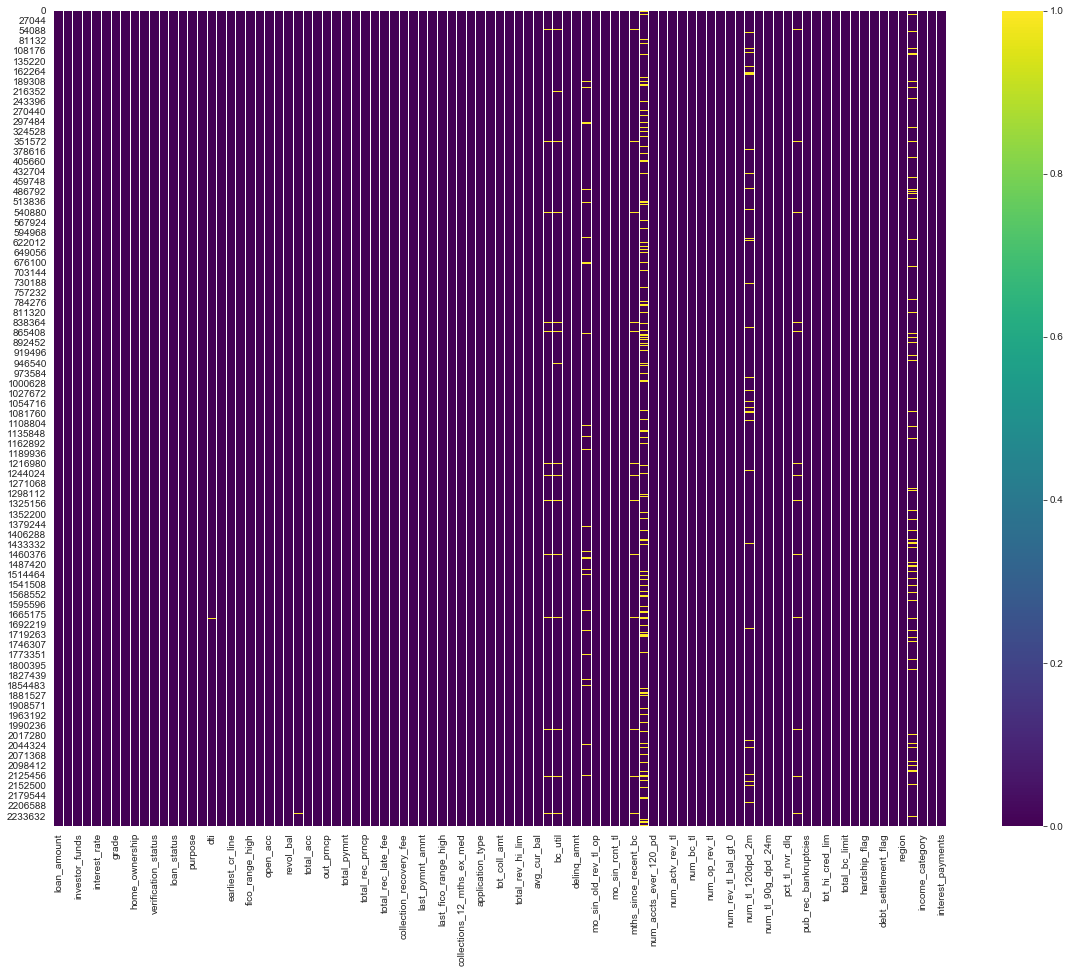

In [83]:
# #Visualizing the distribution of nulls
# #complete_df = complete_df.reset_index(drop=True) 

fig = plt.figure(figsize=(20,15))
sns.heatmap(complete_df.isna(),cmap='viridis')


In [84]:
complete_df.dtypes

loan_amount                   float64
funded_amount                 float64
investor_funds                float64
term                           object
interest_rate                 float64
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_income                 float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc   

In [85]:
complete_df.head()

loan_amount  funded_amount  investor_funds        term  interest_rate  \
0     3600.000       3600.000        3600.000   36 months         13.990   
1    24700.000      24700.000       24700.000   36 months         11.990   
2    20000.000      20000.000       20000.000   60 months         10.780   
3    35000.000      35000.000       35000.000   60 months         14.850   
4    10400.000      10400.000       10400.000   60 months         22.450   

   installment grade sub_grade home_ownership  annual_income  \
0      123.030     C        C4       MORTGAGE      55000.000   
1      820.280     C        C1       MORTGAGE      65000.000   
2      432.660     B        B4       MORTGAGE      63000.000   
3      829.900     C        C5       MORTGAGE     110000.000   
4      289.910     F        F1       MORTGAGE     104433.000   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
0        Not Verified  Dec-2015  Fully Paid          n  debt_consolidation   
1        Not Verified  Dec-2015  Fully Paid          n      small_business   
2        Not Verified  Dec-2015  Fully Paid          n    home_improvement   
3     Source Verified  Dec-2015     Current          n  debt_consolidation   
4     Source Verified  Dec-2015  Fully Paid          n      major_purchase   

  addr_state    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0         PA  5.910        0.000         Aug-2003         675.000   
1         SD 16.060        1.000         Dec-1999         715.000   
2         IL 10.780        0.000         Aug-2000         695.000   
3         NJ 17.060        0.000         Sep-2008         785.000   
4         PA 25.370        1.000         Jun-1998         695.000   

   fico_range_high  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          679.000           1.000     7.000    0.000   2765.000      29.700   
1          719.000           4.000    22.000    0.000  21470.000      19.200   
2          699.000           0.000     6.000    0.000   7869.000      56.200   
3          789.000           0.000    13.000    0.000   7802.000      11.600   
4          699.000           3.000    12.000    0.000  21929.000      64.500   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0     13.000                   w      0.000          0.000     4421.724   
1     38.000                   w      0.000          0.000    25679.660   
2     18.000                   w      0.000          0.000    22705.924   
3     17.000                   w  15897.650      15897.650    31464.010   
4     35.000                   w      0.000          0.000    11740.500   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0         4421.720         3600.000        821.720               0.000   
1        25679.660        24700.000        979.660               0.000   
2        22705.920        20000.000       2705.920               0.000   
3        31464.010        19102.350      12361.660               0.000   
4        11740.500        10400.000       1340.500               0.000   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0       0.000                    0.000     Jan-2019          122.670   
1       0.000                    0.000     Jun-2016          926.350   
2       0.000                    0.000     Jun-2017        15813.300   
3       0.000                    0.000     Feb-2019          829.900   
4       0.000                    0.000     Jul-2016        10128.960   

  last_credit_pull_d  last_fico_range_high  last_fico_range_low  \
0           Mar-2019               564.000              560.000   
1           Mar-2019               699.000              695.000   
2           Mar-2019               704.000              700.000   
3           Mar-2019               679.000              675.000   
4           Mar-2018               704.000              700.000   

   collections_12_mths_ex_med  policy_code application_type  acc

In [86]:
#Notes to self: Pull out month from issue date and delete issue_d

In [87]:
# x = complete_df.copy()
# x['month'] = x.issue_d.apply(lambda x: x.split('-'))[0]
# x['month']

#### Filling In Remaining Null Values

In [88]:
complete_df["delinq_2yrs"]

0          0.000
1          1.000
2          0.000
3          0.000
4          1.000
5          0.000
6          0.000
7          1.000
8          0.000
9          0.000
10         0.000
11         0.000
12         0.000
13         0.000
14         0.000
15         0.000
16         0.000
17         0.000
18         0.000
19         0.000
20         0.000
21         0.000
22         0.000
23         0.000
24         1.000
25         2.000
26         0.000
27         0.000
28         0.000
29         0.000
30         0.000
31         0.000
32         0.000
33         0.000
34         0.000
35         1.000
36         0.000
37         0.000
38         0.000
39         0.000
40         0.000
41         0.000
42         2.000
43         0.000
44         0.000
45         0.000
46         0.000
47         0.000
48         0.000
49         3.000
50         0.000
51         1.000
52         0.000
53         0.000
54         0.000
55         0.000
56         0.000
57         0.000
58         0.0

In [89]:
# Get the mode of next payment date and last payment date and the last date credit amount was pulled   
#complete_df["next_pymnt_d"] = complete_df.groupby("region")["next_pymnt_d"].transform(lambda x: x.fillna(x.mode))

complete_df["last_pymnt_d"] = complete_df.groupby("region")["last_pymnt_d"].transform(lambda x: x.fillna(x.mode))
complete_df["last_credit_pull_d"] = complete_df.groupby("region")["last_credit_pull_d"].transform(lambda x: x.fillna(x.mode))
complete_df["earliest_cr_line"] = complete_df.groupby("region")["earliest_cr_line"].transform(lambda x: x.fillna(x.mode))

# # # Get the mode on the number of accounts in which the client is delinquent
complete_df["pub_rec"] = complete_df.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))

# # # Get the mean of the annual income depending in the region the client is located.
complete_df["annual_income"] = complete_df.groupby("region")["annual_income"].transform(lambda x: x.fillna(x.mean()))

# # Get the mode of the  total number of credit lines the borrower has 
complete_df["total_acc"] = complete_df.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

# # Mode of credit delinquencies in the past two years.
complete_df["delinq_2yrs"] = complete_df.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [90]:
numeric_list = list(complete_df.select_dtypes(['float64','int64']).columns)
numeric_list

['loan_amount',
 'funded_amount',
 'investor_funds',
 'interest_rate',
 'installment',
 'annual_income',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 

In [91]:
#Filling in numeric variables with 

for col in (numeric_list):
    complete_df[col] = complete_df[col].fillna(0)

In [92]:
object_list = list(complete_df.select_dtypes('object').columns)
object_list

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'region',
 'income_category',
 'interest_payments']

In [93]:
#Filling in object variables with 

for col in (object_list):
    complete_df[col] = complete_df[col].fillna('U')

In [94]:
#Checking for nulls

complete_df.isnull().sum()

loan_amount                   0
funded_amount                 0
investor_funds                0
term                          0
interest_rate                 0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_income                 0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

#### Transforming Categoricals into One Hot Vectors and Scaling Numerical values

In [95]:
# Let's make a copy of the dataframe to avoid confusion.
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression


len(complete_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
complete_df['loan_condition_int'].value_counts()/len(complete_df['loan_condition_int']) * 100

0   88.208
1   11.792
Name: loan_condition_int, dtype: float64

The purpose of the code below is to have the same ratio across our training and test sets.

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(complete_df, complete_df["loan_condition_int"]):
    stratified_train = complete_df.iloc[train_set]
    stratified_test = complete_df.iloc[test_set]
    
print('Train set ratio \n', stratified_train["loan_condition_int"].value_counts()/len(complete_df))
print('Test set ratio \n', stratified_test["loan_condition_int"].value_counts()/len(complete_df))

Train set ratio 
 0   0.706
1   0.094
Name: loan_condition_int, dtype: float64
Test set ratio 
 0   0.176
1   0.024
Name: loan_condition_int, dtype: float64


In [97]:
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for test_set, holdout_set in stratified.split(stratified_test, stratified_test["loan_condition_int"]):
    stratified_test_final = stratified_test.iloc[test_set]
    stratified_holdout = stratified_test.iloc[holdout_set]
    
print('Test set ratio \n', stratified_test_final["loan_condition_int"].value_counts()/len(stratified_test))
print('Holdout set ratio \n', stratified_holdout["loan_condition_int"].value_counts()/len(stratified_test))

Test set ratio 
 0   0.794
1   0.106
Name: loan_condition_int, dtype: float64
Holdout set ratio 
 0   0.088
1   0.012
Name: loan_condition_int, dtype: float64


In [98]:
print('Training Set % of Total:', round((len(stratified_train)/len(complete_df)*100),2))
print('Test Set % of Total:', round((len(stratified_test_final)/len(complete_df)*100),2))
print('Holdout Set % of Total:', round((len(stratified_holdout)/len(complete_df)*100),2))

Training Set % of Total: 80.0
Test Set % of Total: 18.0
Holdout Set % of Total: 2.0


In [ ]:
train_df = stratified_train.copy()
test_df = stratified_test_final.copy()
holdout_df = stratified_holdout.copy()

train_df.to_csv('train_df.csv', index_label = 'index')
test_df.to_csv('test_df.csv', index_label = 'index')
holdout_df.to_csv('holdout_df.csv', index_label = 'index')